# Quantrack Python crash course 12.

This notebook is organized as follows :

### 1. Data-loading from Binance API
### 2. Viz - Times series and Candlestick
### 3. Viz - Interactive visualization using Plotly 

In this notebook, we will explore our first time-series data. To gather the dataset, we will connect to Binance and introduce the concepts of API and API Clients or SDK 

* **API Wikipedia definition** : An application programming interface (API) is a computing interface which defines interactions between multiple software intermediaries. It defines the kinds of calls or requests that can be made, how to make them, the data formats that should be used, the conventions to follow, etc. It can also provide extension mechanisms so that users can extend existing functionality in various ways and to varying degrees

* **Software Development Kit** :  A SDK is a set of tools, components and/or classes for a specific purpose. An SDK in fact presents you with an API to interface with. But you might use an API without having the underlying components, for example when the API is provided through a web service.

## 1. Data loading from Binance API

In [91]:
import pandas as pd
import numpy as np

#datetime package
from datetime import datetime

#Client connection package
from binance.client import Client

In [113]:
#Connect to client Using API-Key
api_key = 'your_api_key'
api_secret = 'your_secret_ket'

#connect using binance client
client = Client(api_key, api_secret)

We are now connected to Binance API, we will extract BTC/USDT hourly data . Note that Binance API, like most APIs, has some limitations :

* You can't retrieve more than 500 data-points
* You can't do more than 1200 requests per minute

In [93]:
candles_BTC_1DAY = client.get_klines(symbol='BTCUSDT', interval=Client.KLINE_INTERVAL_1DAY)

At this stage we retrieved data for 1hour-BTC, we want to convert this list of lists to a dev-friendly pandas DataFrame. Columns of interest are :

* Date
* Open price
* High price
* Low price
* Close price

In [95]:
candles_BTC_1DAY

[[1548028800000,
  '3539.26000000',
  '3559.51000000',
  '3475.50000000',
  '3526.90000000',
  '19644.43683900',
  1548115199999,
  '69316548.76685554',
  160825,
  '10462.02027800',
  '36918177.63501831',
  '0'],
 [1548115200000,
  '3526.88000000',
  '3608.50000000',
  '3434.85000000',
  '3570.93000000',
  '29336.44296700',
  1548201599999,
  '103804480.11605988',
  195484,
  '15661.33300100',
  '55461347.69397660',
  '0'],
 [1548201600000,
  '3570.41000000',
  '3607.98000000',
  '3514.50000000',
  '3552.82000000',
  '24938.84269800',
  1548287999999,
  '88816396.34583544',
  192892,
  '13136.69325300',
  '46789527.00878810',
  '0'],
 [1548288000000,
  '3552.97000000',
  '3589.00000000',
  '3529.22000000',
  '3569.62000000',
  '20826.25118000',
  1548374399999,
  '74037052.86632736',
  162159,
  '10975.97457000',
  '39023591.88152408',
  '0'],
 [1548374400000,
  '3569.07000000',
  '3587.15000000',
  '3522.51000000',
  '3565.29000000',
  '17608.34667100',
  1548460799999,
  '62634926.4

In [58]:
#let's convert it to a Pandas DataFrame :
df_BTCUSDT_1DAY_temp  = pd.DataFrame(candles_BTC_1HOUR)
df_BTCUSDT_1hour_temp

,0,1,2,3,4,5,6,7,8,9,10,11
0,1589403600000,9285.00000000,9398.00000000,9252.00000000,9347.12000000,7785.06444300,1589407199999,72736557.30928606,78410,4092.64602300,38238144.23280923,0
1,1589407200000,9347.52000000,9363.96000000,9265.00000000,9318.51000000,3482.15085000,1589410799999,32413947.19317490,34127,1440.09799100,13404228.57634689,0
2,1589410800000,9317.10000000,9349.00000000,9289.98000000,9309.37000000,2506.50386900,1589414399999,23352361.56644664,24489,1079.40398500,10057777.24462475,0
3,1589414400000,9309.35000000,9386.62000000,9285.00000000,9297.01000000,3441.30016900,1589417999999,32123260.72159579,33425,1426.98233700,13318623.08046268,0
4,1589418000000,9297.55000000,9328.62000000,9262.94000000,9270.62000000,2377.47150500,1589421599999,22098103.34853004,24078,898.96296500,8355274.40361059,0
...,...,...,...,...,...,...,...,...,...,...,...,...
495,1591185600000,9617.92000000,9646.43000000,9549.66000000,9598.29000000,3031.26806100,1591189199999,29103595.44030959,34167,1358.96383800,13048564.09707863,0
496,1591189200000,9597.61000000,9614.00000000,9577.00000000,9584.80000000,1862.93386000,1591192799999,17872313.53124663,22853,843.12289000,8088719.59414594,0
497,1591192800000,9583.82000000,9597.55000000,9486.05000000,9580.71000000,3116.27977900,1591196399999,29749809.34948530,33073,1578.24484100,15064228.39994480,0
498,1591196400000,9580.71000000,9593.49000000,9520.03000000,9559.29000000,2110.61321700,1591199999999,20185007.38840159,27805,968.75239800,9266126.50529744,0


We would like to filter out columns of interests, rename them, verify types of objects, and make datetime column readable.

In [77]:
#let's create a preprocessing function :

def clean_data(df, time_index = True):
    
    #filter firstfour columns
    df = df.iloc[:,:5]
    
    #rename columns 
    df.columns = [
        'Date',
        'Open',
        'High',
        'Low',
        'Close'
    ]
    
    #refactor date column
    df['Date'] = df['Date'].apply(lambda x: datetime.fromtimestamp(x / 1000))
    
    #set date as index if index option is True, note that its True by default
    if time_index == True:
        df.index = df.Date
        df = df.drop(['Date'],axis=1)
        return df
    
    else:
        return df
        
    

In [96]:
#let's apply our pre-processing functions
df_BTCUSDT_1hour = clean_data(df_BTCUSDT_1hour_temp, time_index=True)
df_BTCUSDT_1hour

,Open,High,Low,Close
Date,,,,
2020-05-13 16:00:00,9285.00000000,9398.00000000,9252.00000000,9347.12000000
2020-05-13 17:00:00,9347.52000000,9363.96000000,9265.00000000,9318.51000000
2020-05-13 18:00:00,9317.10000000,9349.00000000,9289.98000000,9309.37000000
2020-05-13 19:00:00,9309.35000000,9386.62000000,9285.00000000,9297.01000000
2020-05-13 20:00:00,9297.55000000,9328.62000000,9262.94000000,9270.62000000
...,...,...,...,...
2020-06-03 07:00:00,9617.92000000,9646.43000000,9549.66000000,9598.29000000
2020-06-03 08:00:00,9597.61000000,9614.00000000,9577.00000000,9584.80000000
2020-06-03 09:00:00,9583.82000000,9597.55000000,9486.05000000,9580.71000000


Now that we have our data-set ready, we can start exploring basic *candlestick* visualization on Python 

##### Candlesticks, in four points :  

* Candlestick charts are used by traders to determine possible price movement based on past patterns.
* Candlesticks are useful when trading as they show four price points (open, close, high, and low) throughout the period of time the trader specifies.
* Many algorithms are based on the same price information shown in candlestick charts.
* Trading is often dictated by emotion, which can be read in candlestick charts.

## 2. Viz - Times series and Candlestick

We're going to cover how to create open, high, low, close (OHLC) candlestick charts within Matplotlib. These graphs are used to display time-series stock price information in a condensed form. To do this, we first need a few more imports:

In [97]:
import matplotlib.ticker as mticker
import mplfinance as mpf

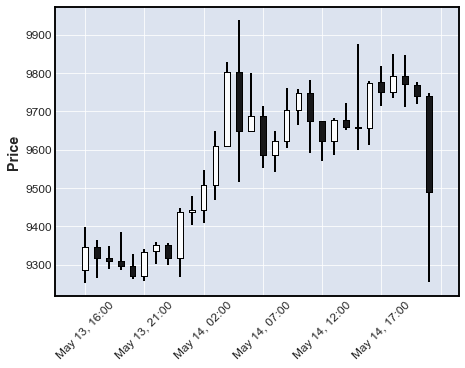

In [98]:
#plot btc 1hour candlestick on 30 first points
mpf.plot(df_BTCUSDT_1hour[0:30],type='candle')

Candlesticks show that emotion by visually representing the size of price moves with different colors. Traders use the candlesticks to make trading decisions based on regularly occurring patterns that help forecast the short-term direction of the price:

![title](https://www.investopedia.com/thmb/9nwzVl-16xZlP9epM3b2H7kdBSc=/6250x0/filters:no_upscale():max_bytes(150000):strip_icc():format(webp)/UnderstandingBasicCandlestickCharts-01_2-7114a9af472f4a2cb5cbe4878c1767da.png)

Let's add moving averages :

* A moving average (MA) is a widely used technical indicator that smooths out price trends by filtering out the “noise” from random short-term price fluctuations. Moving averages can be constructed in several different ways, and employ different numbers of days for the averaging interval

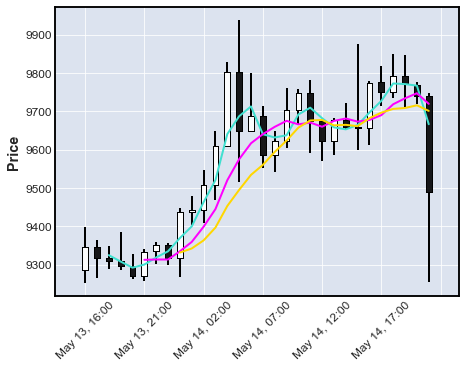

In [99]:
mpf.plot(df_BTCUSDT_1hour[0:30],type='candle', mav=(3,6,9))

## 3. Interactive visualization with plotly

Plotly is a company that makes visualization tools including a Python API library. (Plotly also makes Dash, a framework for building interactive web-based applications with Python code). We’ll stick to working with the plotly Python library in a Jupyter Notebook and touching up images in the online plotly editor. When we make a plotly graph, it’s published online by default which makes sharing visualizations easy.

In [107]:
import plotly.graph_objects as go

In [ ]:
#we need Data

In [112]:
fig = go.Figure(data=[go.Candlestick(x=df_BTCUSDT_1hour.index,
                open=df_BTCUSDT_1hour['Open'],
                high=df_BTCUSDT_1hour['High'],
                low=df_BTCUSDT_1hour['Low'],
                close=df_BTCUSDT_1hour['Close'])])

fig.show()